/tmp/ipython-input-1-1578230941.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock_symbol, start='2022-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


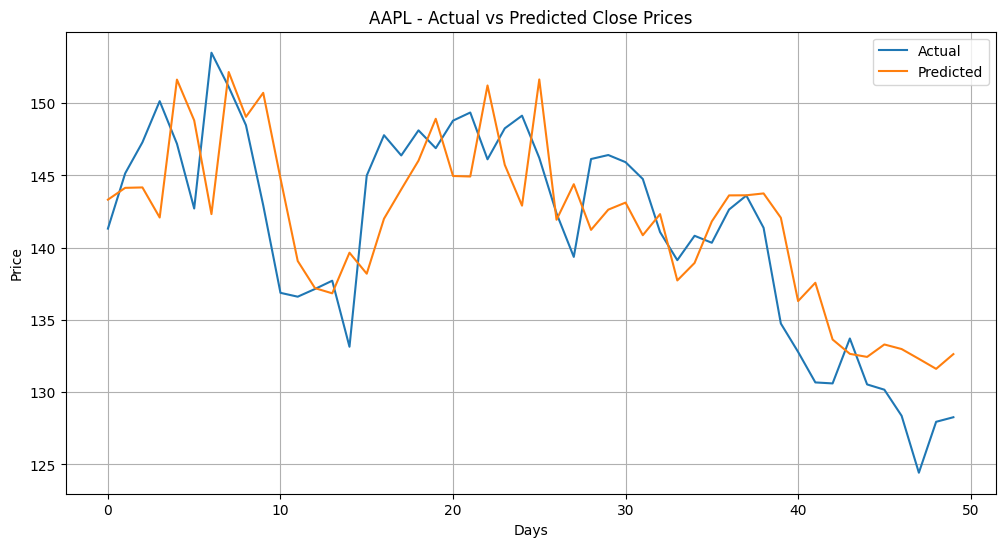

Mean Squared Error: 20.3925


In [1]:
# ✅ Install and import necessary libraries
!pip install yfinance scikit-learn matplotlib --quiet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

stock_symbol = 'AAPL'
data = yf.download(stock_symbol, start='2022-01-01', end='2023-01-01')
data.head()

data['Next_Close'] = data['Close'].shift(-1)
data.dropna(inplace=True)
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# You can switch between RandomForestRegressor and LinearRegression
model = RandomForestRegressor(n_estimators=100, random_state=42)
# model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title(f'{stock_symbol} - Actual vs Predicted Close Prices')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse:.4f}')